In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from rocketpy import Function
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r'Lift coeff completo.csv')

df.dropna(inplace = True)

# Ennvironment
rho = 1.09

# Desired Parameters
timeMax = 3
thetaDotMax = 9 #given in radians per second
thetaDotDotMax = (0 - thetaDotMax)/timeMax

# Europa
J = 0.077
V0 = 25
r = 127/2000
Lr = 2 * r
Ar = np.pi * r**2

# Fin set
N = 4
root = 0.15
tip = 0.06
span = 0.15
delta = 2 * np.pi / 180

# Canards set 
n = 4
Cr = 60 / 1000
Ct = 60 / 1000
s = 100 / 1000
alfa = 11 * np.pi / 180

In [3]:
YtCanard = (r + s/3 * ((Cr + 2 * Ct) / (Cr + Ct))) # it is the Canard's "arm"
YtFins = (r + span/3 * ((root + 2 * tip) / (root + tip))) # it is the Fin's "arm"

def cnalfa(cnalfa0, Cr, Ct, s, r, N):
    Aref = np.pi * r**2
    Af = (Cr + Ct) * s / 2; # fin area
    AR= 2 * (s**2) / Af
    gamac = np.arctan( (Cr - Ct) / (2 * s) ); # mid chord angle
    FD = 2 * np.pi * AR / (cnalfa0 *np.cos(gamac))
    return cnalfa0 * FD * (Af/Aref) * np.cos(gamac) * (N/2) / (2 + FD * ( 1 + (4/FD**2) )**0.5) 

In [4]:
# Creating points for canard A coefficient
alpha = [a/2 for a in range(0, 30)]
V = [v/20 for v in range(2, 16)]

X,Y = np.meshgrid(alpha, V)

Z = []
for i in range(len(X)):
    temp=[]
    for j in range(len(X[i])):
        if Y[i][j]*10 % 1!= 0:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j])][X[i][j]*2]), Cr, Ct, s, r, n) * YtCanard)
        else:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j]) + '0'][X[i][j]*2]), Cr, Ct, s, r, n) * YtCanard)
    Z.append(temp)
ZC = np.array(Z)

In [5]:
# Creating points for canard A coefficient
Z2 = []
for i in range(len(X)):
    temp2=[]
    for j in range(len(X[i])):
        if Y[i][j]*10 % 1!= 0:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j])][X[i][j]*2]), root, tip, span, r, N) * YtFins)
        else:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j]) + '0'][X[i][j]*2]), root, tip, span, r, N)* YtFins)
    Z2.append(temp)
ZF = np.array(Z2)

&lt;Figure size 432x288 with 0 Axes&gt;

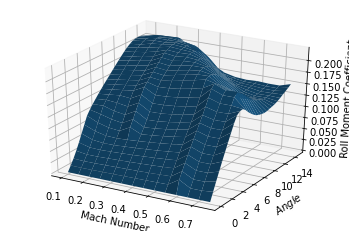

In [6]:
plt.tight_layout()
fig = plt.figure()
sub = fig.add_subplot(111,projection = "3d")
sub.plot_surface(Y, X, ZC)
sub.set_xlabel('Mach Number')
sub.set_ylabel('$Angle$')
sub.set_zlabel('Roll Moment Coefficient')
fig.show()
plt.savefig('Curva 3D')

In [7]:
#print(df)

In [8]:
#t = df['M=0.75']
#print(t)